Total de vulnerabilidades encontradas: 191
Programas con vulnerabilidades:
Git: 3
Microsoft SQL Server 2022 (64-bit): 3
Microsoft SQL Server 2022 (64-bit): 3
Mozilla Firefox (x64 es-ES): 3
Mozilla Maintenance Service: 3
: 3
: 3
Notepad++ (64-bit x64): 3
Tracker: 3
: 3
SQL Server 2022 Database Engine Services: 3
SQL Server 2022 SQL Diagnostics: 3
Microsoft ODBC Driver 17 for SQL Server: 3
SQL Server 2022 Shared Management Objects: 3
SQL Server 2022 Database Engine Shared: 3
Microsoft Update Health Tools: 3
MySQL Server 8.0: 3
Python 3.9.5 Tcl/Tk Support (64-bit): 3
SQL Server 2022 Shared Management Objects Extensions: 3
Microsoft SQL Server 2019 LocalDB : 3
Microsoft Command Line Utilities 15 for SQL Server: 3
SQL Server 2022 Database Engine Services: 3
VS JIT Debugger: 3
Python 3.12.2 Tcl/Tk Support (64-bit symbols): 3
IIS 10.0 Express: 3
Microsoft OLE DB Driver for SQL Server: 3
Azure Data Studio: 3
SQL Server 2022 Database Engine Services: 3
SQL Server 2022 Common Files: 3
SQL Server

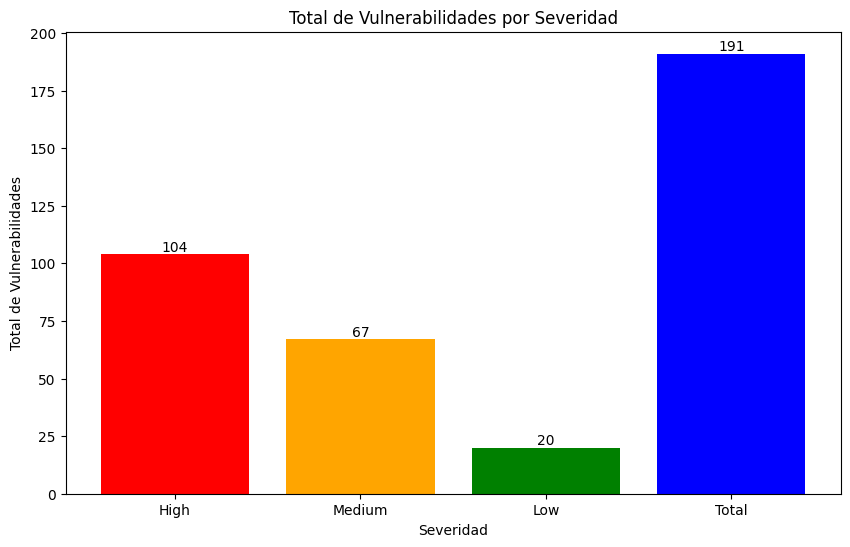

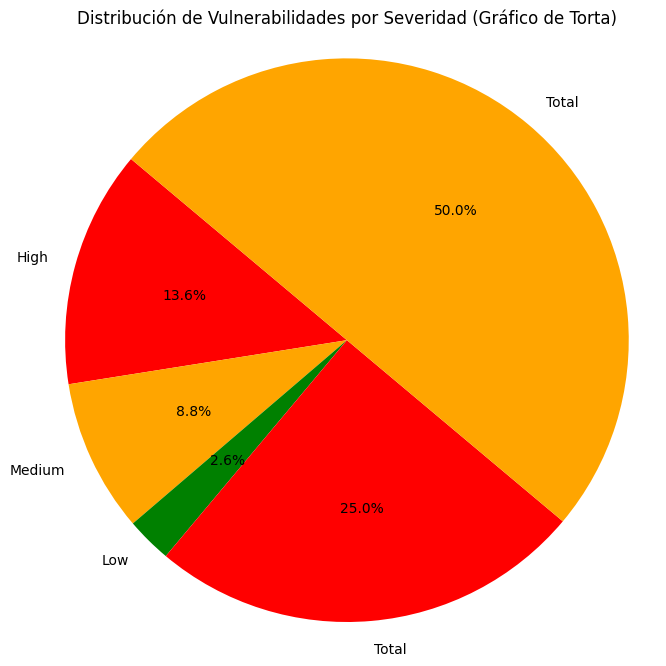

Programa con mayor cantidad de vulnerabilidades:
- Alta severidad: Git (0 vuln.)
- Media severidad: Git (2 vuln.)
- Baja severidad: Git (1 vuln.)
Error al guardar los resultados en Cosmos DB: (BadRequest) Message: {"Errors":["The input content is invalid because the required properties - 'id; ' - are missing. Learn more: https:\/\/aka.ms\/CosmosDB\/sql\/errors\/missing-id"]}
ActivityId: dad4b0cf-a33a-4c73-8443-b4bd232ba5fe, Request URI: /apps/3bb2924a-2c0f-4ef7-b543-05db443c4511/services/198d6e55-6405-49e0-a0ac-9770ea5f01dd/partitions/cb91c507-6cc8-4639-819e-eca7d7b0cc24/replicas/133553049055782487p/, RequestStats: 
RequestStartTime: 2024-04-16T16:21:12.0098566Z, RequestEndTime: 2024-04-16T16:21:12.0118729Z,  Number of regions attempted:1
{"systemHistory":[{"dateUtc":"2024-04-16T16:20:17.8332713Z","cpu":0.303,"memory":481265756.000,"threadInfo":{"isThreadStarving":"False","threadWaitIntervalInMs":0.2316,"availableThreads":32764,"minThreads":52,"maxThreads":32767},"numberOfOpenTcpConnec

In [5]:
import os
import json
import requests
import matplotlib.pyplot as plt
from azure.cosmos import CosmosClient, PartitionKey, exceptions
from windows_tools.installed_software import get_installed_software
from requests.exceptions import RequestException

# Configuración de las variables de entorno y de Azure Cosmos DB
settings = {
    'host': os.environ.get('ACCOUNT_HOST', 'https://andresdia02.documents.azure.com:443/'),  
    'master_key': os.environ.get('ACCOUNT_KEY', 'ovpWKq3QnVf76g2KKnwQb2FArJz9X6lroZ3bqhvqXIkdE3rgxObPWRVWxNU6yWEwDxER5Imd983HACDbCIbnUQ=='),  
    'database_id': os.environ.get('COSMOS_DATABASE', 'base2'),  
    'container_id': os.environ.get('COSMOS_CONTAINER', 'container1')  
}

# Variables de configuración
HOST = settings['host']
MASTER_KEY = settings['master_key']
DATABASE_ID = settings['database_id']
CONTAINER_ID = settings['container_id']

# Función para crear un cliente Cosmos DB
def create_cosmos_client():
    return CosmosClient(HOST, {'masterKey': MASTER_KEY}, user_agent="CosmosDBPythonQuickstart", user_agent_overwrite=True)

# Función para crear una base de datos en Azure Cosmos DB
def create_database(client):
    try:
        return client.create_database(id=DATABASE_ID)
    except exceptions.CosmosResourceExistsError:
        return client.get_database_client(DATABASE_ID)

# Función para crear un contenedor en Azure Cosmos DB
def create_container(db_client):
    try:
        return db_client.create_container(id=CONTAINER_ID, partition_key=PartitionKey(path='/partitionKey'))
    except exceptions.CosmosResourceExistsError:
        return db_client.get_container_client(CONTAINER_ID)

# Función para buscar vulnerabilidades utilizando la API de Vulners
def search_vulnerabilities(software, max_vulnerabilities=3):
    url = "https://vulners.com/api/v3/search/lucene/"
    headers = {"Content-Type": "application/json"}
    data = {
        "query": software,
        "size": max_vulnerabilities
    }
    try:
        response = requests.post(url, headers=headers, data=json.dumps(data))
        if response.status_code == 200:
            return response.json()  # Devuelve los datos de vulnerabilidad en formato JSON si la solicitud fue exitosa
    except Exception as e:
        print(f"Error al buscar vulnerabilidades para {software}: {e}")
    return None

# Función para guardar los resultados en la base de datos Cosmos DB
def save_results_to_cosmosdb(client, container, results):
    try:
        # Insertar cada resultado en el contenedor
        for result in results:
            container.create_item(body=result)
        print("Resultados guardados en Cosmos DB correctamente.")
    except Exception as e:
        print(f"Error al guardar los resultados en Cosmos DB: {e}")

# Función principal
def main():
    # Crear cliente de Azure Cosmos DB
    client = create_cosmos_client()
    # Crear base de datos en Azure Cosmos DB
    db = create_database(client)
    # Crear contenedor en Azure Cosmos DB
    container = create_container(db)

    # Obtener la lista de programas instalados en el sistema
    installed_programs = get_installed_software()
    program_vulnerabilities = []  # Lista para almacenar información sobre los programas y sus vulnerabilidades

    # Contadores de vulnerabilidades de diferentes severidades
    high_vulnerabilities_counts = 0
    medium_vulnerabilities_counts = 0
    low_vulnerabilities_counts = 0

    # Iterar sobre los programas instalados y buscar vulnerabilidades
    for program in installed_programs:
        vulnerabilities = search_vulnerabilities(program['name'])
        if vulnerabilities and 'data' in vulnerabilities:
            program_vulnerabilities.append({'program': program['name'], 'vulnerabilities': vulnerabilities['data']['search']})
            for vulnerability in vulnerabilities['data']['search']:
                cvss_score = vulnerability['_source'].get('cvss', {}).get('score', None)
                if cvss_score:
                    if cvss_score >= 7.0:
                        high_vulnerabilities_counts += 1
                    elif 4.0 <= cvss_score < 7.0:
                        medium_vulnerabilities_counts += 1
                    else:
                        low_vulnerabilities_counts += 1

    # Calcular el total de vulnerabilidades
    total_vulnerabilities = high_vulnerabilities_counts + medium_vulnerabilities_counts + low_vulnerabilities_counts
    print(f"Total de vulnerabilidades encontradas: {total_vulnerabilities}")

    # Contar las vulnerabilidades de diferentes severidades
    vulnerabilities_counts = [high_vulnerabilities_counts, medium_vulnerabilities_counts, low_vulnerabilities_counts]
    vulnerability_labels = ['High', 'Medium', 'Low']
    
    # Ordenar los programas por cantidad de vulnerabilidades
    sorted_programs = sorted(program_vulnerabilities, key=lambda x: len(x['vulnerabilities']), reverse=True)
    print("Programas con vulnerabilidades:")
    for program in sorted_programs:
        print(f"{program['program']}: {len(program['vulnerabilities'])}")

    # Graficar las vulnerabilidades por severidad
    plot_vulnerabilities(vulnerability_labels, vulnerabilities_counts)
    
    # Graficar las vulnerabilidades por severidad como gráfico de torta
    plot_vulnerabilities_pie(vulnerability_labels, vulnerabilities_counts)
    
    # Imprimir el programa con la mayor cantidad de vulnerabilidades por severidad
    print("Programa con mayor cantidad de vulnerabilidades:")
    print(f"- Alta severidad: {sorted_programs[0]['program']} ({len([v for v in sorted_programs[0]['vulnerabilities'] if v['_source'].get('cvss', {}).get('score', 0) >= 7.0])} vuln.)")
    print(f"- Media severidad: {sorted_programs[0]['program']} ({len([v for v in sorted_programs[0]['vulnerabilities'] if 7.0 > v['_source'].get('cvss', {}).get('score', 0) >= 4.0])} vuln.)")
    print(f"- Baja severidad: {sorted_programs[0]['program']} ({len([v for v in sorted_programs[0]['vulnerabilities'] if v['_source'].get('cvss', {}).get('score', 0) < 4.0])} vuln.)")

    # Guardar los resultados en Cosmos DB
    results = [{
        "program": program['program'],
        "high_vulnerabilities": high_vulnerabilities_counts,
        "medium_vulnerabilities": medium_vulnerabilities_counts,
        "low_vulnerabilities": low_vulnerabilities_counts
    } for program in sorted_programs]

    save_results_to_cosmosdb(client, container, results)

# Función para graficar las vulnerabilidades
def plot_vulnerabilities(vulnerability_labels, vulnerabilities_counts):
    total_vulnerabilities = sum(vulnerabilities_counts)
    vulnerability_labels.append('Total')
    vulnerabilities_counts.append(total_vulnerabilities)
    
    plt.figure(figsize=(10, 6))
    plt.bar(vulnerability_labels, vulnerabilities_counts, color=['red', 'orange', 'green', 'blue'])
    plt.xlabel('Severidad')
    plt.ylabel('Total de Vulnerabilidades')
    plt.title('Total de Vulnerabilidades por Severidad')
    for i, count in enumerate(vulnerabilities_counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
    plt.show()

# Función para graficar las vulnerabilidades como un gráfico de torta
def plot_vulnerabilities_pie(vulnerability_labels, vulnerabilities_counts):
    total_vulnerabilities = sum(vulnerabilities_counts)
    vulnerability_labels.append('Total')
    vulnerabilities_counts.append(total_vulnerabilities)
    
    plt.figure(figsize=(8, 8))
    plt.pie(vulnerabilities_counts, labels=vulnerability_labels, autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'green'])
    plt.title('Distribución de Vulnerabilidades por Severidad (Gráfico de Torta)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

if __name__ == "__main__":
    main()
